# Preprocessing the scans
## Grayscale and separate the blades

- It is often the case that the scans have two blades. 
- To make our lives easier, we'll grayscale the scan first
    - It is easier to keep track of a single intensity channel compared to three (RGB)
- We must first split the scan into two individual leaves.
- Some leaves are curved, so it isn't possible to split the image with a straight line.
- Basic image processing used:
    - **Gaussian blur:** Remove noise from the background: if the neighborhood is dark, pixel must be part of the background and should be thresholded out; if the neighborhood is light, the pixels must be part of the leaf and thus should be preserved.
    - **Threshold:** Set to zero (black) all pixels whose intensity (illumination) is lower than a fixed threshold
    - **Closing [Erode + Dilate]:** Remove background noise
    - **Find connected components:** Each component will now be an individual leaf.

### Warning

- Dark spots on the blade might be treated as background noise and thus eliminated
- This may cause artificial holes in the leave
- The contour shouldn't be affected by such artificial holes.

## Load the usual libraries

- `math`: basic math operations
- `os`: enable file manipulation with the OS
- `sys`: enable interaction with commandline
- `glob`: more variable manipulation
- `importlib:` Reload our own `.py`libraries

- `matplotlib.pyplot`: default plotter (I personally like ggplot waaaaay better. E)
    - `inline`: so that plots are shown in the notebook
- `numpy`: all number cruching done here
- `pandas`: data wrangling
- `scipy.ndimage`: basic image processing tools
- `tifffile`: save results as TIF files
- `PIL.Image`: manipulate JPGs

In [1]:
import glob
import os
import importlib

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage as ndimage
import tifffile as tf

### Avoid clutter

- Additional functions are found in the `amaizeing_utils.py` file.
- Use `importlib.reload(maize)` to reflect changes in the `.py` file

In [2]:
import amaizeing_utils as maize
importlib.reload(maize)

<module 'amaizeing_utils' from '/home/ejam/documents/css893/imagening_amaizeing/code/amaizeing_utils.py'>

- `src`: path to the original scans.
- `dst`: path where the split grayscale scans will be written.
- `sigma`: scalar: tune the level of Gaussian blurring. Higher = more blurred.
- `thr`: int between $0$ and $255$. Intensity distinction between background and leaf.
- `cutoff`: float between $0$ and $1$. Minimum percentage of light pixels that an individual leaf should have out of all light pixels in the image.
- `w`: logical. Write the split leaves' images.
- `single_leaves`: list of scan names with only one leaf.

In [3]:
src = '/home/ejam/documents/css893/Leaves2018/'
dst = '/home/ejam/documents/css893/split_grayscale/'
dst = '/home/ejam/documents/css893/foo/'
leaf_file = sorted(glob.glob(src+'*.JPG'))

sigma=8
thr = 165
cutoff = 0.1
w = True
tol = 50
single_leaves = ['IMAG0028', 'IMAG0120', 'IMAG0366', 'IMAG0536', 'IMAG0552', 
                 'IMAG0555', 'IMAG0571', 'IMAG0617', 'IMAG0626', 'IMAG0714',
                 'IMAG0715']

## Separate all the grayscale scans.

In [5]:
for filename in leaf_file:
    print('------------------')
    maize.separate_leaf(filename, dst, single_leaves, thr=thr, sigma=sigma, cutoff=cutoff, tol=tol, w=w)
    print('------------------')

------------------
IMAG0001
Corrected by increasing threshold to 165
2 leaves
hist [6101743 5563599   86033   47431]
------------------
------------------
IMAG0002
Corrected by increasing threshold to 165
2 leaves
hist [5699061 5138533   58801   45210      30      11]
------------------
------------------
IMAG0003
Corrected by increasing threshold to 165
2 leaves
hist [4557647 4345288     817     809     302     132      40      36      26
      24]
------------------
------------------
IMAG0004
Corrected by increasing threshold to 165
2 leaves
hist [6886594 4609538   88857   74512     202     180      96      43      43
      16]
------------------
------------------
IMAG0005
Corrected by increasing threshold to 165
2 leaves
hist [8005352 3666419   73812    2105     392     243     125      24      16
      16]
------------------
------------------
IMAG0006
Corrected by increasing threshold to 174
2 leaves
hist [7411436 3667459]
------------------
------------------
IMAG0008
Corrected

------------------
------------------
IMAG0088
Corrected by increasing threshold to 165
2 leaves
hist [5527502 4484687  170279   66428      12]
------------------
------------------
IMAG0089
Corrected by increasing threshold to 165
2 leaves
hist [7521031 5616704    1424     894     134     120      79      52      49
      39      38      37      35      12]
------------------
------------------
IMAG0090
Corrected by increasing threshold to 165
2 leaves
hist [5969586 4115927   63716   63716     722      63      32]
------------------
------------------
IMAG0091
Corrected by increasing threshold to 165
2 leaves
hist [7070427 6329612   76213   75464     193     181]
------------------
------------------
IMAG0092
Corrected by increasing threshold to 165
2 leaves
hist [6221223 5977247  123791     276     153     108      88      62      13
       2]
------------------
------------------
IMAG0093
Corrected by increasing threshold to 165
2 leaves
hist [7447343 4435691   78278   65332     236

------------------
------------------
IMAG0151
Corrected by increasing threshold to 165
2 leaves
hist [6617486 4972645]
------------------
------------------
IMAG0152
Corrected by increasing threshold to 165
2 leaves
hist [4340289 4301597   98386   54920     434     110      73      69       9]
------------------
------------------
IMAG0154
Corrected by increasing threshold to 165
2 leaves
hist [5169190 5139076     149]
------------------
------------------
IMAG0155
Corrected by increasing threshold to 165
2 leaves
hist [7222383 6273472     436       1]
------------------
------------------
IMAG0156
Corrected by increasing threshold to 165
2 leaves
hist [6259380 4812503     796       1]
------------------
------------------
IMAG0157
Corrected by increasing threshold to 165
2 leaves
hist [7223500 6668133     192      60       8       7]
------------------
------------------
IMAG0159
Corrected by increasing threshold to 165
2 leaves
hist [5916306 5663806     365]
------------------
-----

------------------
------------------
IMAG0247
Corrected by increasing threshold to 165
2 leaves
hist [6433134 5491639]
------------------
------------------
IMAG0249
Corrected by increasing threshold to 165
2 leaves
hist [7181184 5268751   72365   67592     351     223]
------------------
------------------
IMAG0253
Corrected by increasing threshold to 165
2 leaves
hist [5302192 5169343   44233   44217     180      13]
------------------
------------------
IMAG0256
Corrected by increasing threshold to 165
2 leaves
hist [6343841 5496934   68744   68744]
------------------
------------------
IMAG0257
Corrected by increasing threshold to 165
2 leaves
hist [5877222 5798369   76306   74684     834]
------------------
------------------
IMAG0258
Corrected by increasing threshold to 165
2 leaves
hist [5049700 4833711   38252   38252]
------------------
------------------
IMAG0259
Corrected by increasing threshold to 165
2 leaves
hist [5518646 5411143   67268   65670]
------------------
-----

------------------
------------------
IMAG0328
Corrected by increasing threshold to 165
2 leaves
hist [6739594 5850241   50628   50156]
------------------
------------------
IMAG0330
Corrected by increasing threshold to 165
2 leaves
hist [6870193 5405862   52449   46174]
------------------
------------------
IMAG0331
Corrected by increasing threshold to 165
2 leaves
hist [7788753 5607897   76578      97]
------------------
------------------
IMAG0334
Corrected by increasing threshold to 165
2 leaves
hist [7486526 5792340  199024     469     375     253     134      98      92
      47      34]
------------------
------------------
IMAG0335
Corrected by increasing threshold to 165
2 leaves
hist [5963231 5013390   68168     110]
------------------
------------------
IMAG0336
Corrected by increasing threshold to 165
2 leaves
hist [5762427 5339759      92       2]
------------------
------------------
IMAG0337
Corrected by increasing threshold to 165
2 leaves
hist [6219047 4915952]
-------

------------------
------------------
IMAG0404
Corrected by increasing threshold to 165
2 leaves
hist [7725472 6732474]
------------------
------------------
IMAG0406
Corrected by increasing threshold to 165
2 leaves
hist [6722639 5740667    6918    1216     310     139      32]
------------------
------------------
IMAG0407
Corrected by increasing threshold to 165
2 leaves
hist [5497588 5225517   61068   61068     745     192     123       5       4
       1]
------------------
------------------
IMAG0408
Corrected by increasing threshold to 165
2 leaves
hist [5531948 5464278   43128   43128]
------------------
------------------
IMAG0411
Corrected by increasing threshold to 165
2 leaves
hist [6392179 5738197  101515   64801    1134     945     478     248     243
     223     206     105     103     102      96      63      23]
------------------
------------------
IMAG0415
Corrected by increasing threshold to 165
2 leaves
hist [6103983 4929434   21104   21104]
------------------
---

------------------
------------------
IMAG0502
Corrected by increasing threshold to 165
2 leaves
hist [4818976 4060617   56716   56652     198      48      19      14       6
       4       1]
------------------
------------------
IMAG0503
Corrected by increasing threshold to 165
2 leaves
hist [7633389 4421447   86557    4671       8       3]
------------------
------------------
IMAG0504
Corrected by increasing threshold to 165
2 leaves
hist [5466326 5377426   79406   68748]
------------------
------------------
IMAG0505
Corrected by increasing threshold to 165
2 leaves
hist [4972731 4725981   77649   38008     105]
------------------
------------------
IMAG0506
Corrected by increasing threshold to 165
2 leaves
hist [5618840 4444349]
------------------
------------------
IMAG0507
Corrected by increasing threshold to 165
2 leaves
hist [7115234 6396249   23536   23536]
------------------
------------------
IMAG0510
Corrected by increasing threshold to 165
2 leaves
hist [7426198 7296210 

------------------
------------------
IMAG0585
Corrected by increasing threshold to 165
2 leaves
hist [7112739 5551722  235337   75850     155]
------------------
------------------
IMAG0586
Corrected by increasing threshold to 165
2 leaves
hist [6645849 5537747   83919   72714     167      87      67      13]
------------------
------------------
IMAG0588
Corrected by increasing threshold to 165
2 leaves
hist [5953013 5410082   73966   59876      65]
------------------
------------------
IMAG0590
Corrected by increasing threshold to 165
2 leaves
hist [6681288 6123933  137669]
------------------
------------------
IMAG0591
Corrected by increasing threshold to 165
2 leaves
hist [6449385 5491637   21214   21040]
------------------
------------------
IMAG0592
Corrected by increasing threshold to 165
2 leaves
hist [8330958 5537836   81636   72388      38       3]
------------------
------------------
IMAG0593
Corrected by increasing threshold to 165
2 leaves
hist [5478777 5133777    8131  

------------------
------------------
IMAG0659
Corrected by increasing threshold to 165
2 leaves
hist [6637091 5853286  170463   68945    3024    2277    1694    1385     878
     659     523     383     340     258     173      77      58      32
      14       2       1]
------------------
------------------
IMAG0661
Corrected by increasing threshold to 165
2 leaves
hist [9439266 5151180  276540     970     620     185      59      22]
------------------
------------------
IMAG0662
Corrected by increasing threshold to 165
2 leaves
hist [5802784 4360777   43736   43736     575     405]
------------------
------------------
IMAG0664
Corrected by increasing threshold to 165
2 leaves
hist [8465596 6172664     774]
------------------
------------------
IMAG0665
Corrected by increasing threshold to 165
2 leaves
hist [8396541 5135801  112502   70476       6]
------------------
------------------
IMAG0667
Corrected by increasing threshold to 165
2 leaves
hist [7094133 5123849  123977     536

In [9]:
repeat = ['107', '280', '335', '360', '365', '370', '371', '389']
for num in repeat:
    filename = src + 'IMAG0' + num + '.JPG'
    print('------------------')
    maize.separate_leaf(filename, dst, single_leaves, thr=thr, sigma=sigma, cutoff=cutoff, tol=tol, w=w)
    print('------------------')
    

------------------
IMAG0107
Corrected by increasing threshold to 165
2 leaves
hist [7238507 6694493  132302    5614    3127    2932    2458    2151    1746
    1370    1307    1284    1238    1002     946     903     785     770
     498     387     338     261     236     229     225     185     182
     129     118     116      94      87      86      85      57      54
      54      48      37      11       6]
------------------
------------------
IMAG0280
Corrected by increasing threshold to 165
2 leaves
hist [8917441 7546345       2       1]
------------------
------------------
IMAG0335
Corrected by increasing threshold to 165
2 leaves
hist [5963466 5013516   68164     111]
------------------
------------------
IMAG0360
Corrected by increasing threshold to 165
2 leaves
hist [5816016 5007461   65287     129      90      24      21]
------------------
------------------
IMAG0365
Corrected by increasing threshold to 165
2 leaves
hist [7846297 6173656   55203     494       1]
-------

# Visual description of the code

Not meant to be run. For tutorial purposes only.

## First load the image and inverse greyscale it

Make sure the long axis is the horizontal one.

(2576, 10912)

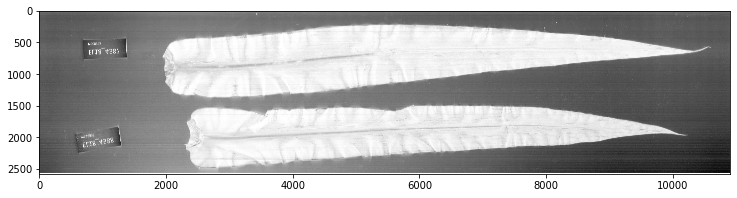

In [61]:
src = '/home/ejam/documents/css893/Leaves2018/'
num = '360'
filename = src + 'IMAG0' + num + '.JPG'

pic = Image.open(filename).convert('L')
img = np.asarray(pic)

if img.shape[1] < img.shape[0]:
    img = img.T
    
img = img.max() - img

plt.figure(figsize=(15,3))
plt.imshow(img, cmap='gray')
img.shape

## Threshold out the background

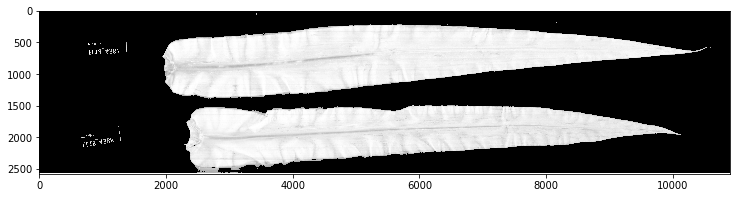

In [62]:
thr = 165
foo = img.copy()
foo[foo < thr] = 0
plt.figure(figsize=(15,3))
plt.imshow(foo, cmap='gray')

# Gaussian blur to make sure most of the background is black

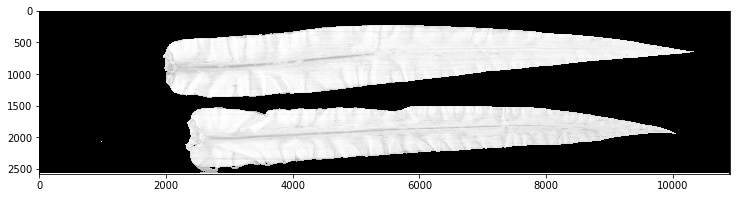

In [63]:
blur = ndimage.gaussian_filter(foo, sigma=8, mode='constant', truncate=3, cval=0)
foo[blur < thr] = 0
plt.figure(figsize=(15,3))
plt.imshow(foo, cmap='gray')

## Count and label all the different connected components

- We expect two massive connected components, one per leaf. Additional smaller components are stray pixels corresponding to the scan label.
- If this isn't the case, then we repeat the Gaussian blur and thresholding steps, more aggressively, until we get two components as expected.

In [64]:
labels , num = ndimage.label(foo, structure=ndimage.generate_binary_structure(img.ndim, 1))

hist,bins = np.histogram(labels, bins=num, range=(1,num+1))
sz_hist = np.sum(hist)

leaves = np.sum(hist > cutoff*sz_hist)
argsort_hist = np.argsort(hist)[::-1]
regions = ndimage.find_objects(labels)

print(leaves, 'leaves')
print('hist', hist[argsort_hist])

2 leaves
hist [5815902 5007150   65288     127      89      25      22]


## Get bounding boxes: one per leaf

- If a connected component represents more than 10% of all the nonzero pixels, then we assume it must be a leaf.
- (If a connected component has less than 10% of non-black pixels, then it must be noise/specks from scan label)
- Inside each box, everything other than the leaf is set to zero (black)
- Write individual TIF files for each individual leaf

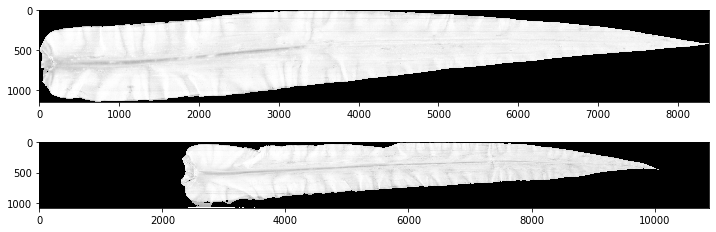

In [69]:
cutoff = 0.1
write_file = False

fig, axes = plt.subplots(2, 1, figsize=(12, 4))

for j in range(len(regions)):
    i = argsort_hist[j]
    r = regions[i]
    if(hist[i]/sz_hist > cutoff):
        x0,y0,x1,y1 = r[0].start,r[1].start,r[0].stop,r[1].stop
        mask = labels[r]==i+1
        box = img[r].copy()
        box[~mask] = 0
        if write_file:
            tf.imwrite('{}{}_l{}_x{}_y{}.tif'.format(dst,bname,j,x0,y0),
                       box,photometric='minisblack',compress=5)
        
        axes[j].imshow(box, cmap='gray')

## In some cases, the margin is bright, and it is confused as part of the leaf.

- Check the corners (of width `tol`) if there are light, narrow stripes
- If there are, remove them
- Do additional Gaussian blurring and thresholding to remove additional shadows
- Remove blocks of black pixels

This is added in with the `clean_corner` function right after defining the bounding boxes for each leaf.

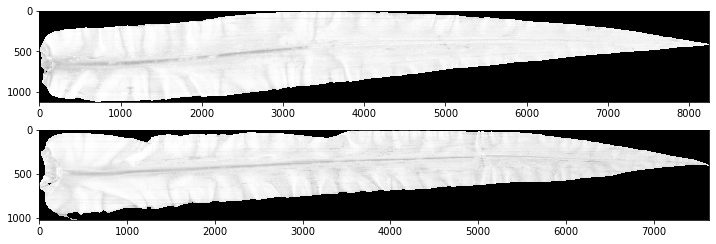

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(12, 4))

for j in range(len(regions)):
    i = argsort_hist[j]
    r = regions[i]
    if(hist[i]/sz_hist > cutoff):
        x0,y0,x1,y1 = r[0].start,r[1].start,r[0].stop,r[1].stop
        mask = labels[r]==i+1
        box = img[r].copy()
        box[~mask] = 0
        box = maize.clean_corner(box, tol)
        if write_file:
            tf.imwrite('{}{}_l{}_x{}_y{}.tif'.format(dst,bname,j,x0,y0),
                       box,photometric='minisblack',compress=5)
        
        axes[j].imshow(box, cmap='gray')